In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# model parameters
#eta = 2.5
#r = 0.4
#tau_star = 1
#tau_sfh = 6
#tau_Ia = 1.5

#m_O_cc = 0.015
#m_Fe_cc = 0.0012
#m_Fe_Ia = 0.0017
#t_D = 0.15

Z_Fe_solar = 0.0012
Z_O_solar = 0.0056

In [5]:
class chem_evo:
    eta = 2.5
    r = 0.4
    tau_star = 1
    tau_sfh = 6
    tau_Ia = 1.5

    m_O_cc = 0.015
    m_Fe_cc = 0.0012
    m_Fe_Ia = 0.0017
    t_D = 0.15

    Z_Fe_solar = 0.0012
    Z_O_solar = 0.0056
    
    def __init__(self, sfh_history="exp", eta=2.5, tau_star=1, tau_sfh=6):
        self.eta = eta
        self.tau_star = tau_star
        self.tau_sfh = tau_sfh
        
        self.tau_dep = self.tau_star/(1 + self.eta - self.r)
        self.tau_dep_Ia = 1/(1/self.tau_dep - 1/self.tau_Ia)
        self.tau_dep_sfh = 1/(1/self.tau_dep - 1/self.tau_sfh)
        self.tau_Ia_sfh = 1/(1/self.tau_Ia - 1/self.tau_sfh)

        self.Z_O_eq = self.m_O_cc / (1 + self.eta - self.r - self.tau_star/self.tau_sfh)
        self.Z_Fe_eq_cc = self.m_Fe_cc / (1 + self.eta - self.r - self.tau_star/self.tau_sfh)
        self.Z_Fe_eq_Ia = self.tau_Ia_sfh / self.tau_Ia * np.exp(self.t_D/self.tau_sfh) * self.m_Fe_Ia / (1 + self.eta - self.r - self.tau_star/self.tau_sfh)
        
        if sfh_history == "constant":
            self.Z_O = lambda t: self.m_O_cc / (1 + self.eta - self.r) * (1 - np.exp(-t/self.tau_dep))
            self.Z_Fe_cc = lambda t: self.m_Fe_cc / (1 + self.eta - self.r) * (1 - np.exp(-t/self.tau_dep))   
            def Z_Fe_Ia_lin(t):
                delta_t = t - self.t_D
                return (t > self.t_D)*self.m_Fe_Ia / (1 + self.eta - self.r) * (1 - np.exp(-delta_t/self.tau_dep)
                                                 - self.tau_dep_Ia / self.tau_dep * (np.exp(-delta_t/self.tau_Ia) - np.exp(-delta_t/self.tau_dep)))
            self.Z_Fe_Ia = Z_Fe_Ia_lin
            
        elif sfh_history == "linexp":
            self.Z_O = lambda t: self.Z_O_eq * (1 - self.tau_dep_sfh/t * ( 1 - np.exp(-t/self.tau_dep_sfh)))
            self.Z_Fe_cc = lambda t: self.Z_Fe_eq_cc * (1 - self.tau_dep_sfh/t * (1 - np.exp(-t/self.tau_dep_sfh) ))

            def Z_Fe_Ia_lexp(t):
                delta_t = t - self.t_D
                return (t > self.t_D) * self.Z_Fe_eq_Ia * self.tau_Ia_sfh/t * (delta_t/self.tau_Ia_sfh + self.tau_dep_Ia/self.tau_dep_sfh *np.exp(-delta_t/self.tau_Ia_sfh)
                                                                + (1+self.tau_dep_sfh/self.tau_Ia_sfh - self.tau_dep_Ia/self.tau_dep_sfh)*np.exp(-delta_t/self.tau_dep_sfh)
                                                                - (1 + self.tau_dep_sfh/self.tau_Ia_sfh))
            self.Z_Fe_Ia = Z_Fe_Ia_lexp
            
        elif sfh_history == "exp":
            self.Z_O = lambda t: self.Z_O_eq * (1 - np.exp(-t/self.tau_dep_sfh))
            self.Z_Fe_cc = lambda t: self.Z_Fe_eq_cc * (1 - np.exp(-t/self.tau_dep_sfh))
            def Z_Fe_Ia(t):
                delta_t = t - self.t_D
                return (t > self.t_D) * self.Z_Fe_eq_Ia * (1 - np.exp(-delta_t/self.tau_dep_sfh) - 
                                                 self.tau_dep_Ia/self.tau_dep_sfh * (np.exp(-delta_t/self.tau_Ia_sfh) - 
                                                                                     np.exp(-delta_t/self.tau_dep_sfh)))
            self.Z_Fe_Ia = Z_Fe_Ia
        else:
            print("error :(")
            
        
    def Z_Fe(self, t):
        return self.Z_Fe_cc(t) + self.Z_Fe_Ia(t)

    def Fe_H(self, t):
        return np.log10(self.Z_Fe_cc(t) + self.Z_Fe_Ia(t)) - np.log10(Z_Fe_solar)

    def O_Fe(self, t):
        return np.log10(self.Z_O(t)/(self.Z_Fe_cc(t) + self.Z_Fe_Ia(t))) - np.log10(Z_O_solar/Z_Fe_solar)
    
    def O_H(self, t):
        return np.log10(self.Z_O(t)) - np.log10(Z_O_solar)

    
    

<ipython-input-5-e394080e769d>:41: RuntimeWarning: divide by zero encountered in true_divide
  self.Z_Fe_cc = lambda t: self.Z_Fe_eq_cc * (1 - self.tau_dep_sfh/t * (1 - np.exp(-t/self.tau_dep_sfh) ))
<ipython-input-5-e394080e769d>:41: RuntimeWarning: invalid value encountered in multiply
  self.Z_Fe_cc = lambda t: self.Z_Fe_eq_cc * (1 - self.tau_dep_sfh/t * (1 - np.exp(-t/self.tau_dep_sfh) ))
<ipython-input-5-e394080e769d>:45: RuntimeWarning: invalid value encountered in true_divide
  return (t > self.t_D) * self.Z_Fe_eq_Ia * self.tau_Ia_sfh/t * (delta_t/self.tau_Ia_sfh + self.tau_dep_Ia/self.tau_dep_sfh *np.exp(-delta_t/self.tau_Ia_sfh)
<ipython-input-5-e394080e769d>:40: RuntimeWarning: divide by zero encountered in true_divide
  self.Z_O = lambda t: self.Z_O_eq * (1 - self.tau_dep_sfh/t * ( 1 - np.exp(-t/self.tau_dep_sfh)))
<ipython-input-5-e394080e769d>:40: RuntimeWarning: invalid value encountered in multiply
  self.Z_O = lambda t: self.Z_O_eq * (1 - self.tau_dep_sfh/t * ( 1 - np.e

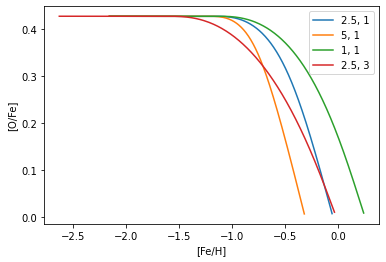

In [6]:
t = np.linspace(0., 14, 1000)
for eta, tau_star in [(2.5,1), (5,1), (1,1), (2.5,3)]:
    model = chem_evo(sfh_history="linexp", eta=eta, tau_star=tau_star)
    plt.plot(model.Fe_H(t), model.O_Fe(t), label=f"{eta}, {tau_star}")

plt.xlabel("[Fe/H]")
plt.ylabel("[O/Fe]")
plt.legend()

<ipython-input-5-e394080e769d>:67: RuntimeWarning: divide by zero encountered in log10
  return np.log10(self.Z_Fe_cc(t) + self.Z_Fe_Ia(t)) - np.log10(Z_Fe_solar)
<ipython-input-5-e394080e769d>:70: RuntimeWarning: invalid value encountered in true_divide
  return np.log10(self.Z_O(t)/(self.Z_Fe_cc(t) + self.Z_Fe_Ia(t))) - np.log10(Z_O_solar/Z_Fe_solar)
<ipython-input-5-e394080e769d>:67: RuntimeWarning: divide by zero encountered in log10
  return np.log10(self.Z_Fe_cc(t) + self.Z_Fe_Ia(t)) - np.log10(Z_Fe_solar)
<ipython-input-5-e394080e769d>:70: RuntimeWarning: invalid value encountered in true_divide
  return np.log10(self.Z_O(t)/(self.Z_Fe_cc(t) + self.Z_Fe_Ia(t))) - np.log10(Z_O_solar/Z_Fe_solar)
<ipython-input-5-e394080e769d>:41: RuntimeWarning: divide by zero encountered in true_divide
  self.Z_Fe_cc = lambda t: self.Z_Fe_eq_cc * (1 - self.tau_dep_sfh/t * (1 - np.exp(-t/self.tau_dep_sfh) ))
<ipython-input-5-e394080e769d>:41: RuntimeWarning: invalid value encountered in multiply
 

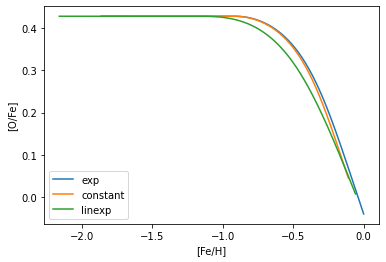

In [7]:
for sfh_hist in ("exp", "constant", "linexp"):
    model = chem_evo(sfh_history=sfh_hist)
    plt.plot(model.Fe_H(t), model.O_Fe(t), label=sfh_hist)
    
plt.xlabel("[Fe/H]")
plt.ylabel("[O/Fe]")
plt.legend()

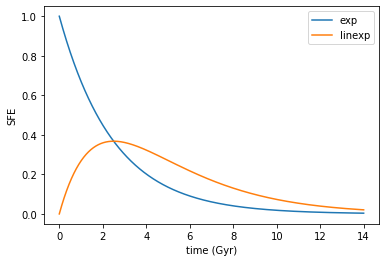

In [22]:
tau_sfh = 2.5
t = np.linspace(0,14,1000)
plt.plot(t, np.exp(-t/tau_sfh), label="exp")
plt.plot(t, t/tau_sfh * np.exp(-t/tau_sfh), label="linexp")
plt.xlabel("time (Gyr)")
plt.ylabel("SFE")
plt.legend()

<ipython-input-5-e394080e769d>:67: RuntimeWarning: divide by zero encountered in log10
  return np.log10(self.Z_Fe_cc(t) + self.Z_Fe_Ia(t)) - np.log10(Z_Fe_solar)
<ipython-input-5-e394080e769d>:73: RuntimeWarning: divide by zero encountered in log10
  return np.log10(self.Z_O(t)) - np.log10(Z_O_solar)
<ipython-input-5-e394080e769d>:67: RuntimeWarning: divide by zero encountered in log10
  return np.log10(self.Z_Fe_cc(t) + self.Z_Fe_Ia(t)) - np.log10(Z_Fe_solar)
<ipython-input-5-e394080e769d>:73: RuntimeWarning: divide by zero encountered in log10
  return np.log10(self.Z_O(t)) - np.log10(Z_O_solar)
<ipython-input-5-e394080e769d>:67: RuntimeWarning: divide by zero encountered in log10
  return np.log10(self.Z_Fe_cc(t) + self.Z_Fe_Ia(t)) - np.log10(Z_Fe_solar)
<ipython-input-5-e394080e769d>:73: RuntimeWarning: divide by zero encountered in log10
  return np.log10(self.Z_O(t)) - np.log10(Z_O_solar)
<ipython-input-5-e394080e769d>:41: RuntimeWarning: divide by zero encountered in true_divid

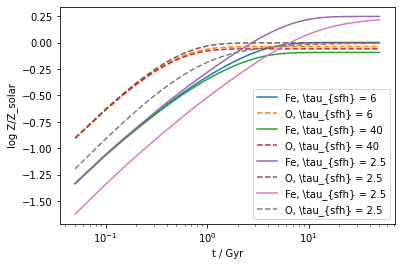

In [9]:
# recreate fig 3
t = np.linspace(0,50,1000)

for eta, tau_star, tau_sfh, sfh_hist in [(2.5,1,6, "exp"), (2.5,1, 40,"exp"), (2.5,1, 2.5,"exp"), (2.5,1, 2.5,"linexp")]:
    model = chem_evo(eta=eta, tau_star=tau_star, tau_sfh=tau_sfh, sfh_history=sfh_hist)
    plt.plot(t, model.Fe_H(t), label=f"Fe, \\tau_{{sfh}} = {tau_sfh}")
    plt.plot(t, model.O_H(t), "--",label=f"O, \\tau_{{sfh}} = {tau_sfh}")

plt.xlabel("t / Gyr")
plt.ylabel("log Z/Z_solar")
plt.legend()
plt.xscale("log")

In [17]:
# MDF calculations

def M_star_dot_exp(t):
    return np.exp(-t/tau_sfh)

def M_star_dot_lexp(t):
    return t/tau_sfh*np.exp(-t/tau_sfh)

bins=np.linspace(-2,1,60)

def generate_MDF(Z, M_star_dot, t = np.linspace(0,14,10000), bins=np.linspace(-2,1,60)):
    dt = t[1] - t[0]
    MDF = np.zeros(shape=len(bins))
    
    for time in t:
        # Z = np.log10(Z_Fe(t)/Z_Fe_solar)
        bin_idx = np.searchsorted(bins, Z(time), side="left")
        M = M_star_dot(time) * dt
        if bin_idx >= len(bins):
            MDF[len(bins) - 1] += M
        else:
            MDF[bin_idx] += M
    return MDF
    


<ipython-input-5-e394080e769d>:67: RuntimeWarning: divide by zero encountered in log10
  return np.log10(self.Z_Fe_cc(t) + self.Z_Fe_Ia(t)) - np.log10(Z_Fe_solar)
<ipython-input-5-e394080e769d>:67: RuntimeWarning: divide by zero encountered in log10
  return np.log10(self.Z_Fe_cc(t) + self.Z_Fe_Ia(t)) - np.log10(Z_Fe_solar)
<ipython-input-5-e394080e769d>:67: RuntimeWarning: divide by zero encountered in log10
  return np.log10(self.Z_Fe_cc(t) + self.Z_Fe_Ia(t)) - np.log10(Z_Fe_solar)
<ipython-input-5-e394080e769d>:41: RuntimeWarning: divide by zero encountered in double_scalars
  self.Z_Fe_cc = lambda t: self.Z_Fe_eq_cc * (1 - self.tau_dep_sfh/t * (1 - np.exp(-t/self.tau_dep_sfh) ))
<ipython-input-5-e394080e769d>:41: RuntimeWarning: invalid value encountered in double_scalars
  self.Z_Fe_cc = lambda t: self.Z_Fe_eq_cc * (1 - self.tau_dep_sfh/t * (1 - np.exp(-t/self.tau_dep_sfh) ))
<ipython-input-5-e394080e769d>:45: RuntimeWarning: invalid value encountered in double_scalars
  return (t

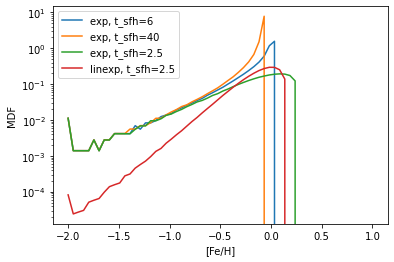

In [18]:
for eta, tau_star, tau_sfh in [(2.5,1,6), (2.5,1, 40), (2.5,1, 2.5)]:
    model = chem_evo(eta=eta, tau_star=tau_star, tau_sfh=tau_sfh)
    plt.plot(bins, generate_MDF(model.Fe_H, M_star_dot_exp), label=f"exp, t_sfh={tau_sfh}")
    
model = chem_evo("linexp", tau_sfh=2.5)
plt.plot(bins, generate_MDF(model.Fe_H, M_star_dot_lexp), label="linexp, t_sfh=2.5")

plt.xlabel("[Fe/H]")
plt.ylabel("MDF")
plt.yscale("log")
plt.legend()

<ipython-input-5-e394080e769d>:73: RuntimeWarning: divide by zero encountered in log10
  return np.log10(self.Z_O(t)) - np.log10(Z_O_solar)
<ipython-input-5-e394080e769d>:73: RuntimeWarning: divide by zero encountered in log10
  return np.log10(self.Z_O(t)) - np.log10(Z_O_solar)
<ipython-input-5-e394080e769d>:73: RuntimeWarning: divide by zero encountered in log10
  return np.log10(self.Z_O(t)) - np.log10(Z_O_solar)
<ipython-input-5-e394080e769d>:40: RuntimeWarning: divide by zero encountered in double_scalars
  self.Z_O = lambda t: self.Z_O_eq * (1 - self.tau_dep_sfh/t * ( 1 - np.exp(-t/self.tau_dep_sfh)))
<ipython-input-5-e394080e769d>:40: RuntimeWarning: invalid value encountered in double_scalars
  self.Z_O = lambda t: self.Z_O_eq * (1 - self.tau_dep_sfh/t * ( 1 - np.exp(-t/self.tau_dep_sfh)))


(0.001, 10)

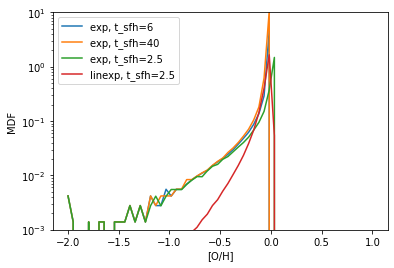

In [19]:
for eta, tau_star, tau_sfh in [(2.5,1,6), (2.5,1, 40), (2.5,1, 2.5)]:
    model = chem_evo(eta=eta, tau_star=tau_star, tau_sfh=tau_sfh)
    plt.plot(bins, generate_MDF(model.O_H, M_star_dot_exp), label=f"exp, t_sfh={tau_sfh}")
    
model = chem_evo("linexp", tau_sfh=2.5)
plt.plot(bins, generate_MDF(model.O_H, M_star_dot_lexp), label="linexp, t_sfh=2.5")

plt.xlabel("[O/H]")
plt.ylabel("MDF")
plt.yscale("log")
plt.legend()
plt.ylim(10**-3, 10**1)


<ipython-input-5-e394080e769d>:67: RuntimeWarning: divide by zero encountered in log10
  return np.log10(self.Z_Fe_cc(t) + self.Z_Fe_Ia(t)) - np.log10(Z_Fe_solar)
<ipython-input-5-e394080e769d>:67: RuntimeWarning: divide by zero encountered in log10
  return np.log10(self.Z_Fe_cc(t) + self.Z_Fe_Ia(t)) - np.log10(Z_Fe_solar)
<ipython-input-5-e394080e769d>:67: RuntimeWarning: divide by zero encountered in log10
  return np.log10(self.Z_Fe_cc(t) + self.Z_Fe_Ia(t)) - np.log10(Z_Fe_solar)
<ipython-input-5-e394080e769d>:67: RuntimeWarning: divide by zero encountered in log10
  return np.log10(self.Z_Fe_cc(t) + self.Z_Fe_Ia(t)) - np.log10(Z_Fe_solar)


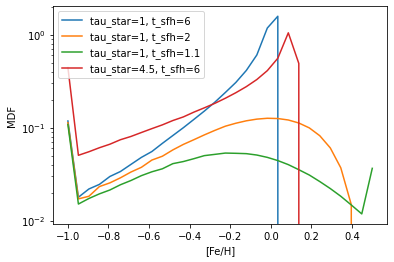

In [20]:
bins = np.linspace(-1,0.5,30)
for eta, tau_star, tau_sfh in [(2.5,1,6), (2.5,1, 2), (2.5,1, 1.1), (2.5,4.5,6)]:
    model = chem_evo(eta=eta, tau_star=tau_star, tau_sfh=tau_sfh)
    plt.plot(bins, generate_MDF(model.Fe_H, M_star_dot_exp, bins=bins), label=f"tau_star={tau_star}, t_sfh={tau_sfh}")
    
plt.xlabel("[Fe/H]")
plt.ylabel("MDF")
plt.yscale("log")
plt.legend()